<a href="https://colab.research.google.com/github/TiwariLaxuu/Pytorch-Practice/blob/master/Intro2Opt_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OxML 2022: Introduction to Optimisation (ML Fundamental)
By Yali Du,  Runji Lin, Ziyan Wang, Xue Yan


## Algorithum Demo: Gradient Descent 
For this part, we use a linear regression example and show different convergence rates and situations for different ***size_steps***.

### Install and Importation

In [ ]:
%matplotlib inline
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
import warnings
from matplotlib import cm
warnings.filterwarnings("ignore")

### Implementation for Gradient Descent 

In [ ]:
def gradient_descent(x, y, theta_init, step, maxsteps, precision ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

def plotting():
    ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
    bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)
    M, B = np.meshgrid(ms, bs)
    zs = np.array([error(xaug, y, theta) 
                  for theta in zip(np.ravel(M), np.ravel(B))])
    Z = zs.reshape(M.shape)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap=cm.coolwarm, rstride=1, cstride=1, color='b', alpha=0.55)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=0)
    ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
    ax.view_init(elev=20., azim=30)
    ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)
    ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)

    ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=15)
    ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=5)



    # Set some labels
    ax.set_xlabel('x-axis',fontsize=24, fontweight='bold')
    ax.set_ylabel('y-axis',fontsize=24, fontweight='bold')
    ax.set_zlabel('z-axis',fontsize=24, fontweight='bold')

def prt():
  print("## Liner regression ##")
  print("Least Squares: [{:.2f}, {:.2f}]".format(intercept, slope))
  print("## Gradient Descent ##")
  print("Finial Converge to the point : [{:.2f}, {:.2f}]".format(theta[0], theta[1]))
  print("The number of iterations : {:d} steps".format(iters))

###Liner regression (Least Squares)

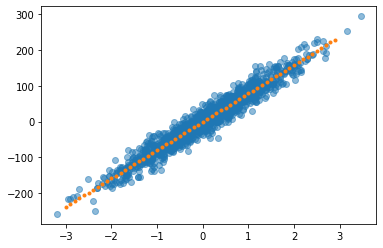

In [ ]:
x, y = make_regression(n_samples = 1300, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2022)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

### Plot Loss Surface

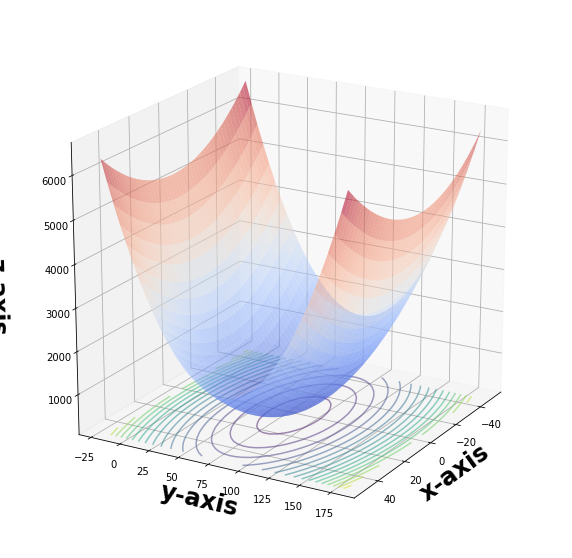

In [ ]:
theta =  [intercept, slope]
xaug = np.c_[np.ones(x.shape[0]), x]
def plotting_loss_surface():
    ms = np.linspace(0 - 50 , 0 + 50, 50)
    bs = np.linspace(79.18 - 100 , 79.18 + 100, 40)
    M, B = np.meshgrid(ms, bs)
    zs = np.array([error(xaug, y, theta) 
                  for theta in zip(np.ravel(M), np.ravel(B))])
    Z = zs.reshape(M.shape)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap=cm.coolwarm, rstride=1, cstride=1, color='b', alpha=0.55)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=0)
    ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
    ax.view_init(elev=20., azim=30)

    # Set some labels
    ax.set_xlabel('x-axis',fontsize=24, fontweight='bold')
    ax.set_ylabel('y-axis',fontsize=24, fontweight='bold')
    ax.set_zlabel('z-axis',fontsize=24, fontweight='bold')

plotting_loss_surface()

### Gradient Descent in 0.5 learning step (Converge))

## Liner regression ##
Least Squares: [-0.34, 79.18]
## Gradient Descent ##
Finial Converge to the point : [-0.34, 79.17]
The number of iterations : 14 steps


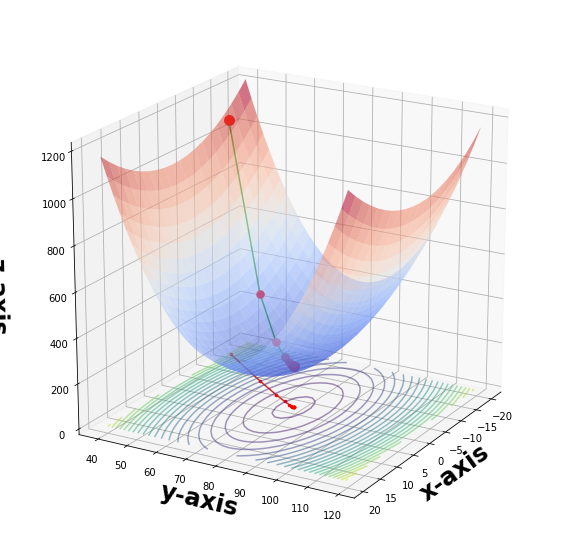

In [ ]:
step_size = 0.5
precision = 0.0001

xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step_size, 0, precision,)
theta = history[-1]
prt()
plotting()
plt.show()

In [ ]:
#@title For Gif
# generate gif, run after the specific method run
history_gd05, cost_gd05 = history, cost
theta =  history_gd05[-1]
method_name = "gd05"
for i in range(2,100):
  print(i)
  history, cost = history_gd05[0:i], cost_gd05[0:i]
  plotting()
  plt.savefig(f'{method_name}-{i}.png')
import imageio
with imageio.get_writer(f'{method_name}.gif', mode='I') as writer:
    for filename in [f'{method_name}-{i}.png' for i in range(2,70)]:
        image = imageio.imread(filename)
        writer.append_data(image)

### Gradient Descent in 0.1 learning step (Slow Converge)

In [ ]:
#@title Plotting
def plotting():
    #print("X: ", theta[1]," abs(theta[1]) :", abs(theta[1]))
    ms = np.linspace(  -(-0.34 + 20) , -0.34 +  20, 20)
    bs = np.linspace(79.18 - 40 , 79.18 + 40 , 40)
    M, B = np.meshgrid(ms, bs)
    zs = np.array([error(xaug, y, theta) 
                  for theta in zip(np.ravel(M), np.ravel(B))])
    Z = zs.reshape(M.shape)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap=cm.coolwarm, rstride=1, cstride=1, color='b', alpha=0.55)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=0)
    ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
    ax.view_init(elev=20., azim=30)
    ax.plot([history[0][0]], [history[0][1]], [cost[0]], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)
    ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)

    ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=15)
    ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=5)



    # Set some labels
    ax.set_xlabel('x-axis',fontsize=24, fontweight='bold')
    ax.set_ylabel('y-axis',fontsize=24, fontweight='bold')
    ax.set_zlabel('z-axis',fontsize=24, fontweight='bold')

def prt():
  print("## Liner regression ##")
  print("Least Squares: [{:.2f}, {:.2f}]".format(intercept, slope))
  print("## Gradient Descent ##")
  print("Finial Converge to the point : [{:.2f}, {:.2f}]".format(theta[0], theta[1]))
  print("The number of iterations : {:d} steps".format(iters))

## Liner regression ##
Least Squares: [-0.34, 79.18]
## Gradient Descent ##
Finial Converge to the point : [-0.35, 79.15]
The number of iterations : 69 steps


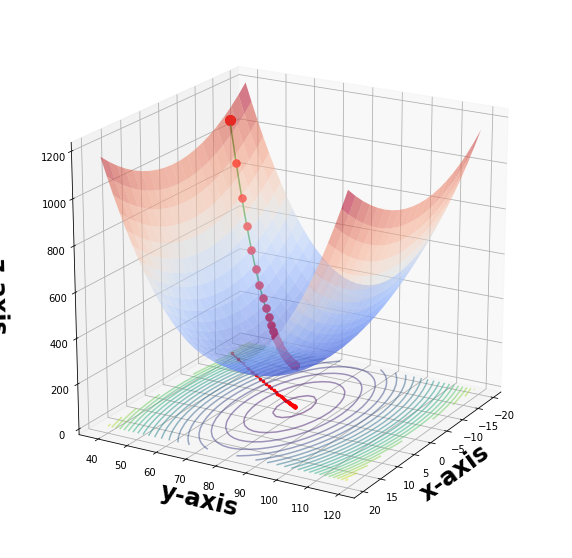

In [ ]:
step_size = 0.1
precision = 0.0001
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step_size, 0, precision,)
theta = history[-1]
prt()
plotting()
plt.show()

In [ ]:
#@title For Gif
# generate gif, run after the specific method run
history_gd01, cost_gd01 = history, cost
theta =  history_gd01[-1]
method_name = "gd01"
for i in range(1,100):
  # print(i)
  history, cost = history_gd01[0:i], cost_gd01[0:i]
  plotting()
  plt.savefig(f'{method_name}-{i}.png')
import imageio
with imageio.get_writer(f'{method_name}.gif', mode='I') as writer:
    for filename in [f'{method_name}-{i}.png' for i in range(1,25)]:
        image = imageio.imread(filename)
        writer.append_data(image)

### Gradient Descent in 2.3 learning step(Diverge)

In [ ]:
#@title Plotting
def plotting():
    #print("X: ", theta[1]," abs(theta[1]) :", abs(theta[1]))
    ms = np.linspace(  -(-0.34 + abs(theta[1])*0.6 + 50) , -0.34 + abs(theta[1])*0.6 +50, 20)
    bs = np.linspace(79.18 - abs(theta[1]) -200, 79.18 + abs(theta[1]) +200, 40)
    M, B = np.meshgrid(ms, bs)
    zs = np.array([error(xaug, y, theta) 
                  for theta in zip(np.ravel(M), np.ravel(B))])
    Z = zs.reshape(M.shape)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap=cm.coolwarm, rstride=1, cstride=1, color='b', alpha=0.55)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=0)
    ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
    ax.view_init(elev=20., azim=30)
    ax.plot([history[0][0]], [history[0][1]], [cost[0]], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)
    ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)

    ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=15)
    ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=5)



    # Set some labels
    ax.set_xlabel('x-axis',fontsize=24, fontweight='bold')
    ax.set_ylabel('y-axis',fontsize=24, fontweight='bold')
    ax.set_zlabel('z-axis',fontsize=24, fontweight='bold')

def prt():
  print("## Liner regression ##")
  print("Least Squares: [{:.2f}, {:.2f}]".format(intercept, slope))
  print("## Gradient Descent ##")
  print("Finial Converge to the point : [{:.2f}, {:.2f}]".format(theta[0], theta[1]))
  print("The number of iterations : {:d} steps".format(iters))

## Liner regression ##
Least Squares: [-0.34, 79.18]
## Gradient Descent ##
Finial Converge to the point : [-488.42, -617.50]
The number of iterations : 11 steps


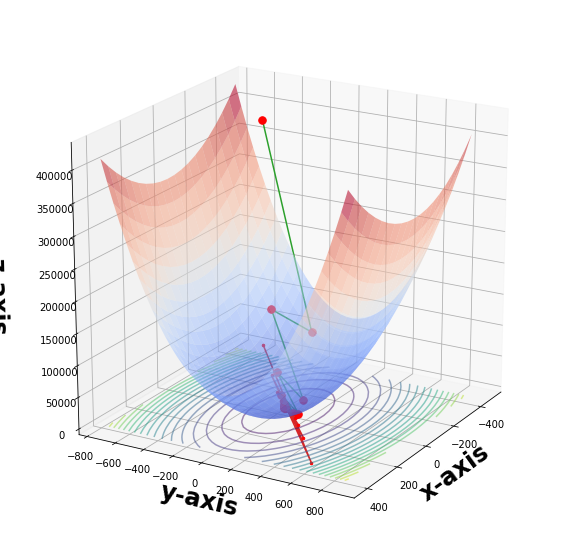

In [ ]:
step_size = 2.3
precision = 0.0001
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step_size, 11, precision,)
theta = history[-1]
prt()
plotting()
plt.show()

In [ ]:
#@title For Gif
# generate gif, run after the specific method run
history_gd23, cost_gd23 = history, cost
theta =  history_gd23[-1]
method_name = "gd23"
for i in range(2,100):
  print(i)
  history, cost = history_gd23[0:i], cost_gd23[0:i]
  plotting()
  plt.savefig(f'{method_name}-{i}.png')
import imageio
with imageio.get_writer(f'{method_name}.gif', mode='I') as writer:
    for filename in [f'{method_name}-{i}.png' for i in range(2,70)]:
        image = imageio.imread(filename)
        writer.append_data(image)

## Application Example(Convex)：Linear Regression with MSE loss

Given data points $\mathbf{x}^1,...,\mathbf{x}^n\in \mathbb{R}^d$ and $y^1,...,y^n\in \mathbb{R}$, find the best fit line. Consider a simple linear regression model with $\hat{y}=\mathbf{w}^T\mathbf{x}+b$. The formulation can be simplified to $$\hat{y} = \boldsymbol{\theta}^T\tilde{\mathbf{x}}$$, in which $\boldsymbol{\theta}=[\mathbf{w}^T,b]^T, \tilde{\mathbf{x}}=[\mathbf{x}^T,1]^T$.

Objective:
$$ \min_{\boldsymbol{\theta}} f(\boldsymbol{\theta}) = \frac{1}{2n} \sum_{i=1}^{n} (\boldsymbol{\theta}^T \mathbf{x}'_i-{y}_i)^2 $$

### Install and Importation

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import random
from sklearn.datasets import make_regression
%matplotlib inline
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

### Prepare Dataset

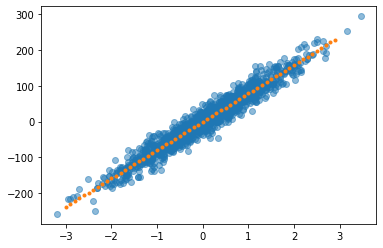

In [ ]:
x, y = make_regression(n_samples = 1300, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2022)
x = x.flatten()
xaug = np.c_[np.ones(x.shape[0]), x]
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

### Plot Loss Surface

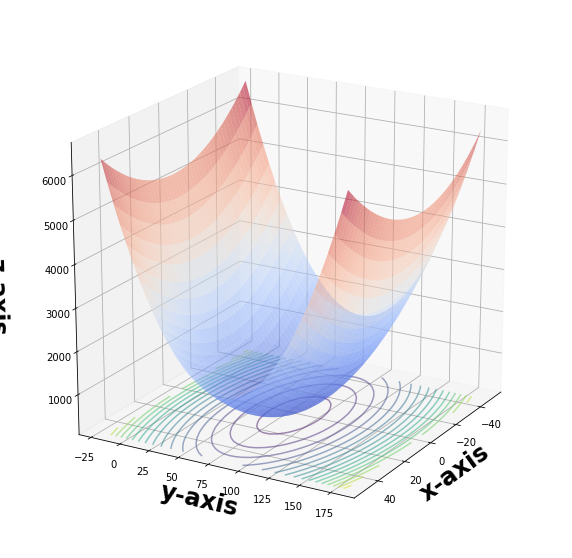

In [ ]:
theta =  [intercept, slope]
def plotting_loss_surface():
    ms = np.linspace(0 - 50 , 0 + 50, 50)
    bs = np.linspace(79.18 - 100 , 79.18 + 100, 40)
    M, B = np.meshgrid(ms, bs)
    zs = np.array([error(xaug, y, theta) 
                  for theta in zip(np.ravel(M), np.ravel(B))])
    Z = zs.reshape(M.shape)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap=cm.coolwarm, rstride=1, cstride=1, color='b', alpha=0.55)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=0)
    ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
    ax.view_init(elev=20., azim=30)

    # Set some labels
    ax.set_xlabel('x-axis',fontsize=24, fontweight='bold')
    ax.set_ylabel('y-axis',fontsize=24, fontweight='bold')
    ax.set_zlabel('z-axis',fontsize=24, fontweight='bold')

plotting_loss_surface()

### Implementation for GD, SGD, Mini-SGD and Adam

In [ ]:
## GD method [GD, SGD, Mini-SGD, SGD+Adam]
def gradient_descent(x, y, theta_init, step, maxsteps, precision, method='GD', batch_size=1, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    if method == 'Adam':
      gred_m = 0
      gred_n = 0
    
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        if method == 'GD':
          gradient = x.T.dot(error)/m 
        elif method == 'SGD':
          idx = random.sample(range(0, m), 1)
          gradient = x[idx].T.dot(error[idx]) 
        elif method == 'Mini-SGD':
          idx = random.sample(range(0, m), batch_size)
          gradient = x[idx].T.dot(error[idx])/ batch_size
        elif method == 'Adam':
          idx = random.sample(range(0, m), batch_size)
          batch_gradient = x[idx].T.dot(error[idx])/ batch_size

          gred_m = beta1 * gred_m + (1-beta1) * batch_gradient
          gred_n = beta2 * gred_n + (1-beta2) * batch_gradient**2

          gred_m_adaptive = gred_m/(1-beta1**counter)
          gred_n_adaptive = gred_n/(1-beta2**counter)

          gradient = gred_m_adaptive/ (np.sqrt(gred_n_adaptive) + epsilon)

          
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

def plotting():
    ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
    bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)
    M, B = np.meshgrid(ms, bs)
    zs = np.array([error(xaug, y, theta) 
                  for theta in zip(np.ravel(M), np.ravel(B))])
    Z = zs.reshape(M.shape)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap=cm.coolwarm, rstride=1, cstride=1, color='b', alpha=0.55)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=0)
    ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
    ax.view_init(elev=20., azim=30)
    #ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)
    #ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)

    ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=15)
    ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=5)



    # Set some labels
    ax.set_xlabel('x-axis',fontsize=24, fontweight='bold')
    ax.set_ylabel('y-axis',fontsize=24, fontweight='bold')
    ax.set_zlabel('z-axis',fontsize=24, fontweight='bold')

def prt():
  print("## Liner regression ##")
  print("Least Squares: [{:.2f}, {:.2f}]".format(intercept, slope))
  print("## Gradient Descent ##")
  print("Finial Converge to the point : [{:.2f}, {:.2f}]".format(theta[0], theta[1]))
  print("The number of iterations : {:d} steps".format(iters))

### Run GD

## Liner regression ##
Least Squares: [-0.34, 79.18]
## Gradient Descent ##
Finial Converge to the point : [-0.35, 79.15]
The number of iterations : 69 steps


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: The following kwargs were not used by contour: 'color'
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


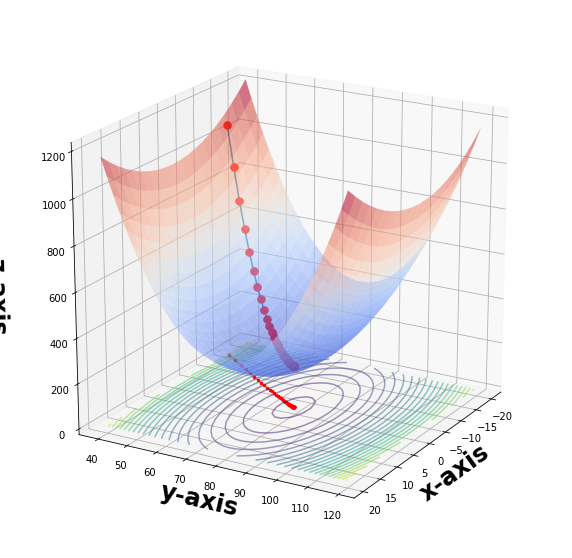

In [ ]:
step_size = 0.1
precision = 0.0001
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step_size, 0, precision,method='GD')
theta = history[-1]
prt()
plotting()
plt.show()
gd_cost = cost

### Run SGD method 

## Liner regression ##
Least Squares: [-0.34, 79.18]
## Gradient Descent ##
Finial Converge to the point : [0.10, 82.38]
The number of iterations : 1726 steps


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: The following kwargs were not used by contour: 'color'
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


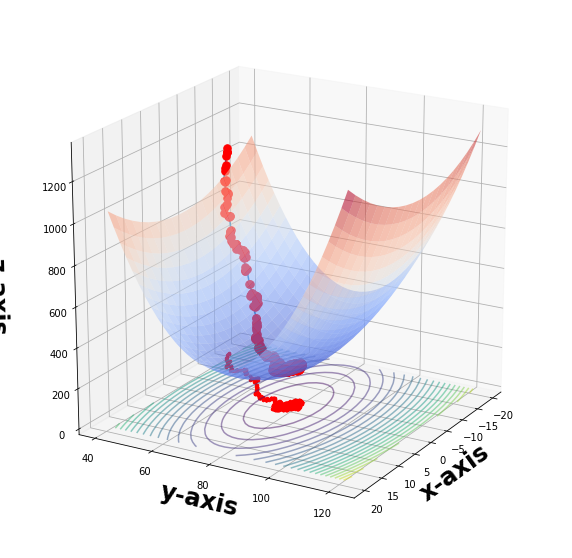

In [ ]:
step_size = 0.01
precision = 0.0001

xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step_size, 0, precision,method='SGD')
theta = history[-1]
prt()
plotting()
plt.show()
sgd_cost = cost

### Run mini-Batch SGD

## Liner regression ##
Least Squares: [-0.34, 79.18]
## Gradient Descent ##
Finial Converge to the point : [0.45, 78.50]
The number of iterations : 601 steps


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: The following kwargs were not used by contour: 'color'
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


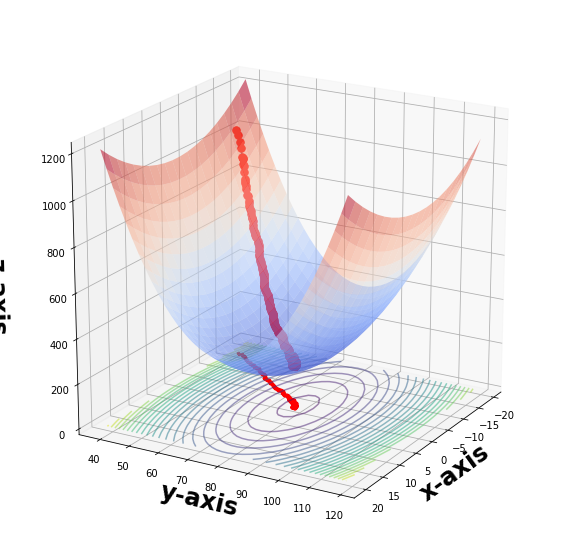

In [ ]:
step_size = 0.01
precision = 0.0001

xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step_size, 0, precision,method='Mini-SGD', batch_size=10)
theta = history[-1]
prt()
plotting()
plt.show()
mini_sgd_cost = cost

### Run Adam

## Liner regression ##
Least Squares: [-0.34, 79.18]
## Gradient Descent ##
Finial Converge to the point : [-1.94, 78.54]
The number of iterations : 120 steps


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: The following kwargs were not used by contour: 'color'
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


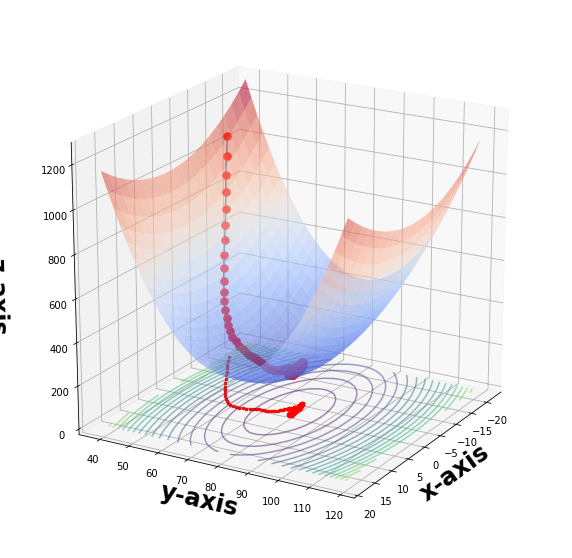

In [ ]:
step_size = 1.5
precision = 0.001

xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step_size, 0, precision,method='Adam', batch_size=10, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
theta = history[-1]
prt()
plotting()
plt.show()
adam_cost = cost

### Plot Train Loss Curve & Save Gif

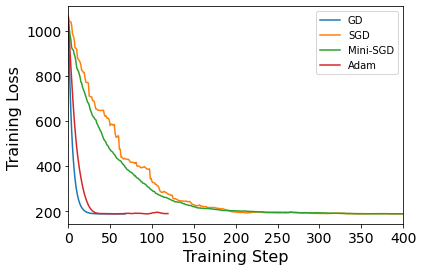

In [ ]:
plt.plot(list(range(len(gd_cost))),gd_cost, label='GD')
plt.plot(list(range(len(sgd_cost))),sgd_cost, label='SGD')
plt.plot(list(range(len(mini_sgd_cost))),mini_sgd_cost, label='Mini-SGD')
plt.plot(list(range(len(adam_cost))),adam_cost, label='Adam')
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim([0, 400])
plt.xlabel("Training Step",size=16) 
plt.ylabel("Training Loss ",size=16)
plt.legend()   

In [ ]:
# generate gif, run after the specific method run
history_all, cost_all = history, cost

In [ ]:
theta =  history_all[-1]
method_name = "Mini-SGD"
for i in range(2,100):
  print(i)
  history, cost = history_all[0:i], cost_all[0:i]
  plotting()
  plt.savefig(f'{method_name}-{i}.png')

import imageio
with imageio.get_writer(f'{method_name}.gif', mode='I') as writer:
    for filename in [f'{method_name}-{i}.png' for i in range(2,100)]:
        image = imageio.imread(filename)
        writer.append_data(image)

## Application Example(Non-Convex)：Two-class Classification with MSE loss

Logistic Regression: 2 classification problem
$x=[x_1,x_2]$


$$f(x)=sigmoid(x_1+w x_2+b),sigmoid(x)=\frac{1}{1+e^{-x}}$$

MSE loss
$L=1/n \sum_{i=1}^n (f(x)-y)^2$

### Install and Importation

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import random
from sklearn.datasets import make_regression
%matplotlib inline
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

### Prepare Dataset

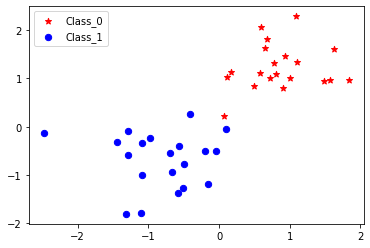

In [ ]:
def get_data(data_size=100):
    data_label = np.zeros((2 * data_size, 1))
    x1 = np.reshape(np.random.normal(1, 0.5, data_size), (data_size, -1))
    y1 = np.reshape(np.random.normal(1, 0.5, data_size), (data_size, -1))
    data_train = np.concatenate((x1, y1), axis=1)
    data_label[0:data_size, :] = 0
    x2 = np.reshape(np.random.normal(-1, 0.5, data_size), (data_size, -1))
    y2 = np.reshape(np.random.normal(-1, 0.5, data_size), (data_size, -1))
    data_train = np.concatenate((data_train, np.concatenate((x2, y2), axis=1)), axis=0)
    data_label[data_size:2 * data_size, :] = 1
    return data_train, data_label

import random
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

import matplotlib.pyplot as plt
N=20
x, y = get_data(N)
plt.scatter(x[:N, 0], x[:N, 1], c='r', marker='*', s=40, label='Class_0')
plt.scatter(x[N:, 0], x[N:, 1], c='b', marker='o', s=40, label='Class_1')
plt.legend()
plt.show()

### Implementation for GD, SGD, Mini-SGD and Adam

In [ ]:
def f(x):
    return 1.0 / (1 + np.exp(-x))#(1-1.0 / (1 + np.exp(-x)))**2#0.5*(1-np.tanh(x))#


def gradient_descenty(x, y, theta_init, step, maxsteps, precision, method='GD', batch_size=4, eta=0.01, beta1=0.9,
                      beta2=0.999, epsilon=1e-8):
    costs = []
    m = y.size  # number of data points
    theta = theta_init
    history = []  # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = f(np.dot(x, theta)).reshape(y.shape)  # np.dot(x, theta)
    error = (pred - y) #* pred * (1 - pred)  # pred - y
    currentcost = np.sum(np.square(y - f(x.dot(theta)).reshape(y.shape))) / (2*y.size)  #
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta[1:])
    counter += 1
    if method == 'Adam':
        gred_m = 0
        gred_n = 0
    steps=0
    maxsteps=4000
    while abs(currentcost - oldcost) > precision:#steps<maxsteps:
        steps+=1
        oldcost = currentcost
        if method == 'GD':
            gradient = x.T.dot(error) / m
        elif method == 'SGD':
            idx = random.sample(range(0, m), 1)
            gradient = x[idx].T.dot(error[idx])
        elif method == 'Mini-SGD':
            idx = random.sample(range(0, m), batch_size)
            gradient = x[idx].T.dot(error[idx]) / batch_size
        elif method == 'Adam':
            idx = random.sample(range(0, m), batch_size)
            batch_gradient = x[idx].T.dot(error[idx]) / batch_size

            gred_m = beta1 * gred_m + (1 - beta1) * batch_gradient
            gred_n = beta2 * gred_n + (1 - beta2) * batch_gradient ** 2

            gred_m_adaptive = gred_m / (1 - beta1 ** counter)
            gred_n_adaptive = gred_n / (1 - beta2 ** counter)

            gradient = gred_m_adaptive / (np.sqrt(gred_n_adaptive) + epsilon)
        theta = theta - step * gradient.reshape(theta.shape)  # update
        theta[0] = 1.0
        history.append(theta[1:])
        pred = f(np.dot(x, theta)).reshape(y.shape)  # np.dot(x, theta)
        error = (pred - y) * pred * (1 - pred)  # pred - y
        currentcost =np.sum(np.square(y - f(x.dot(theta)).reshape(y.shape))) / (2*y.size)  # np.sum(-y*np.log(f(x.dot(theta)))-(1-y)*np.log(1-f(x.dot(theta))))/(y.size)#error(x,y,theta)#np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)

        if counter % 25 == 0: preds.append(pred)
        counter += 1
        if maxsteps:
            if counter == maxsteps:
                break

    return history, costs, preds, counter


def error(X, Y, THETA):
    THETA = np.array(THETA).copy()
    THETA = THETA.reshape(THETA.shape[0]).copy()
    if THETA.shape[0] == 2:
        THETA = np.concatenate([[1], THETA], axis=0) 
    return np.sum(np.square(Y - f(X.dot(THETA)).reshape(Y.shape))) / (2* Y.size)  #

def plotting():
    ms = np.linspace(- 11, + 5, 50)#np.linspace(theta[0] - 1 , theta[0] + 1, 40)
    bs = np.linspace(- 5 , + 5, 50)#np.linspace(theta[1] - 1 , theta[1] + 1, 40)
    M, B = np.meshgrid(ms, bs)
    zs = np.array([error(xaug, y, theta)
                  for theta in zip(np.ravel(M), np.ravel(B))])
    Z = zs.reshape(M.shape)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap=cm.coolwarm, rstride=1, cstride=1, color='b', alpha=0.55)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=0)
    ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
    ax.view_init(elev=20., azim=110)
    ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=15)
    ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=5)

    # Set some labels
    ax.set_xlabel('x-axis',fontsize=24, fontweight='bold')
    ax.set_ylabel('y-axis',fontsize=24, fontweight='bold')
    ax.set_zlabel('z-axis',fontsize=24, fontweight='bold')

### Plot Loss Surface

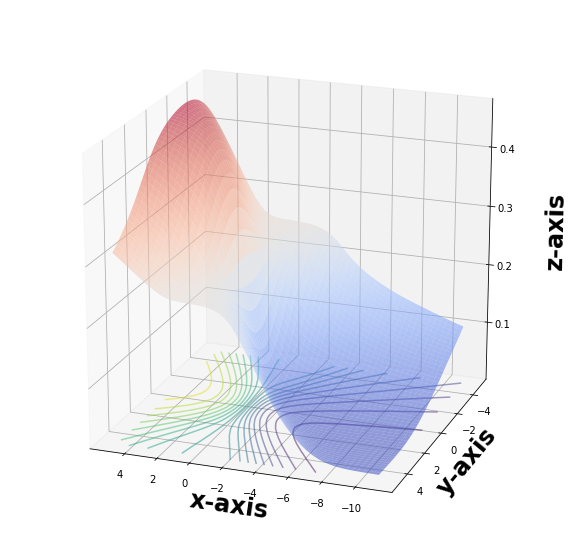

In [ ]:
theta =  np.array([1,2,-2])
xaug = np.c_[x,np.ones(x.shape[0]) ]#x1,x2,1
def plotting_loss_surface():
    ms = np.linspace(- 11, + 5, 50)#np.linspace(theta[0] - 1 , theta[0] + 1, 40)
    bs = np.linspace(- 5 , + 5, 50)#np.linspace(theta[1] - 1 , theta[1] + 1, 40)
    M, B = np.meshgrid(ms, bs)
    zs = np.array([error(xaug, y, theta)
                  for theta in zip(np.ravel(M), np.ravel(B))])
    Z = zs.reshape(M.shape)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap=cm.coolwarm, rstride=1, cstride=1, color='b', alpha=0.55)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=0)
    ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
    ax.view_init(elev=20., azim=110)

    # Set some labels
    ax.set_xlabel('x-axis',fontsize=24, fontweight='bold')
    ax.set_ylabel('y-axis',fontsize=24, fontweight='bold')
    ax.set_zlabel('z-axis',fontsize=24, fontweight='bold')


plotting_loss_surface()

### Run GD

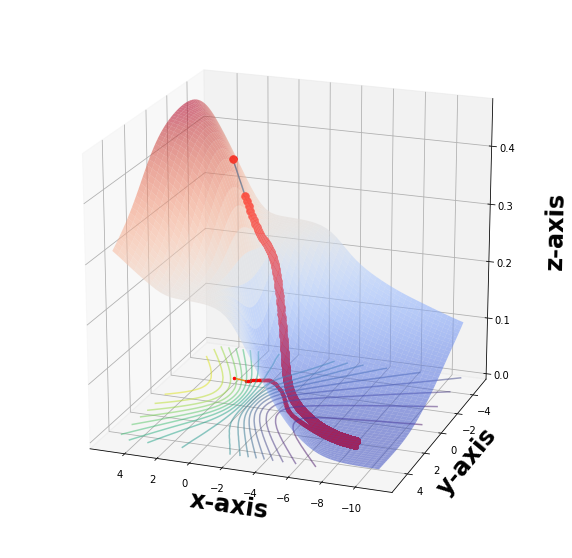

In [ ]:
step_size = 1
precision = 1e-8
xaug = np.c_[x,np.ones(x.shape[0]) ]#x1,x2,1
theta_i = np.array([1,2,-2])#([1]+list(np.random.rand(2)))# 1,w2,b
history, cost, preds, iters = gradient_descenty(xaug, y, theta_i, step_size, 0, precision,method='GD')
theta = history[-1]
plotting()
gd_cost = cost

### Run SGD 

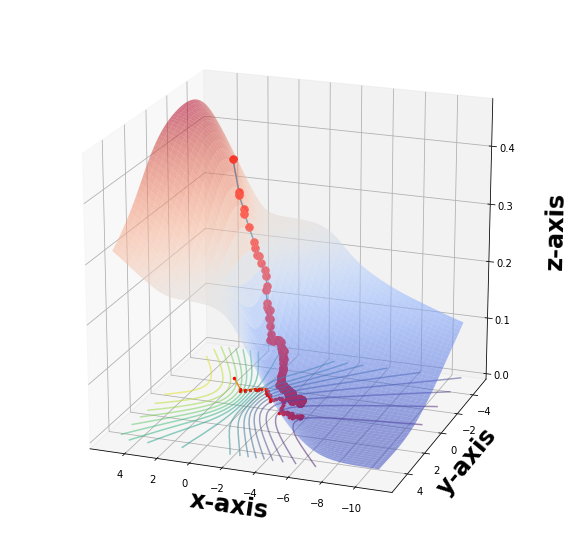

In [ ]:
step_size = 1
precision = 1e-8
xaug = np.c_[x,np.ones(x.shape[0]) ]#x1,x2,1
theta_i = np.array([1,2,-2])# 1,w2,b
history, cost, preds, iters = gradient_descenty(xaug, y, theta_i, step_size, 0, precision,method='SGD')
theta = history[-1]
plotting()
plt.show()
sgd_cost = cost

### Run mini-Batch SGD

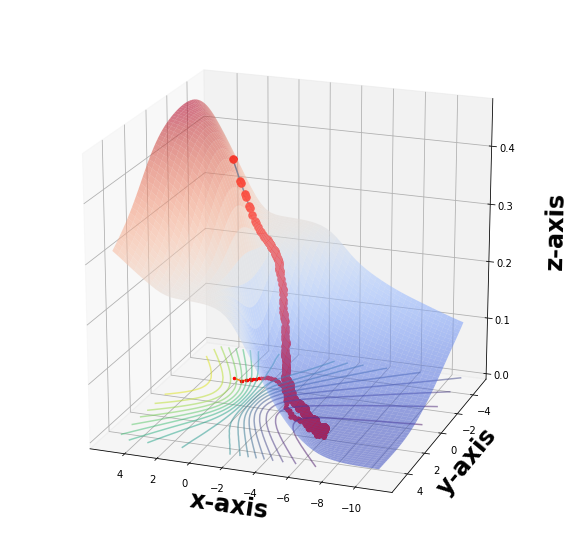

In [ ]:
step_size = 1
precision = 1e-8
xaug = np.c_[x,np.ones(x.shape[0]) ]#x1,x2,1
theta_i = np.array([1,2,-2])# 1,w2,b
history, cost, preds, iters = gradient_descenty(xaug, y, theta_i, step_size, 0, precision,method='Mini-SGD', batch_size=4)
theta = history[-1]
plotting()
plt.show()
mini_sgd_cost = cost

### Run Adam

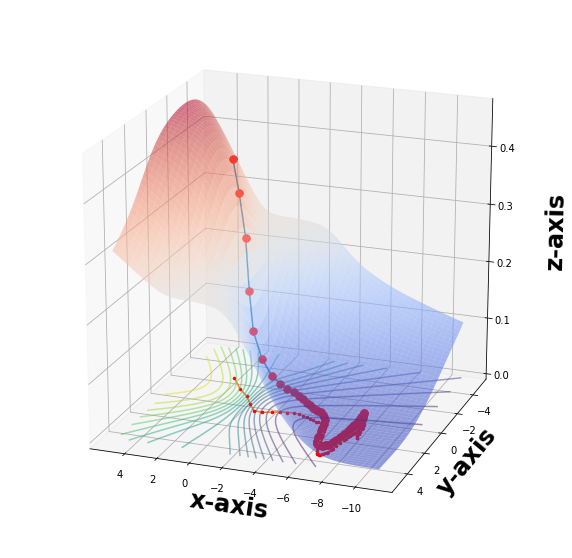

In [ ]:
step_size = 1
precision = 1e-5
xaug = np.c_[x,np.ones(x.shape[0]) ]#x1,x2,1
theta_i = np.array([1,2,-2])# 1,w2,b
history, cost, preds, iters = gradient_descenty(xaug, y, theta_i, step_size, 0, precision,method='Adam', batch_size=4, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
theta = history[-1]
plotting()
plt.show()
adam_cost = cost

### Plot Train Loss Curve & Save Gif

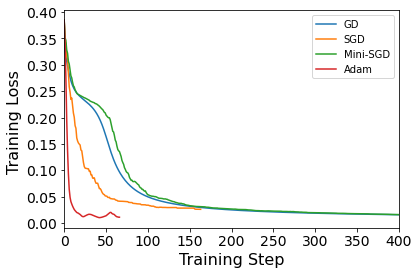

In [ ]:
plt.plot(list(range(len(gd_cost))),gd_cost, label='GD')
plt.plot(list(range(len(sgd_cost))),sgd_cost, label='SGD')
plt.plot(list(range(len(mini_sgd_cost))),mini_sgd_cost, label='Mini-SGD')
plt.plot(list(range(len(adam_cost))),adam_cost, label='Adam')
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim([0, 400])
plt.xlabel("Training Step",size=16) 
plt.ylabel("Training Loss ",size=16)
plt.legend()   

In [ ]:
#@title Gif
# generate gif, run after the specific method run
history_new=[]
cost_new=[]
for i in range(0,len(history),1):
  history_new.append(history[i])
  cost_new.append(cost[i])
history_all=history_new
cost_all=cost_new
N=len(history_all)
theta =  history_all[-1]
method_name = "GD"
for i in range(2,N):
  print(i)
  history, cost = history_all[0:i], cost_all[0:i]
  plotting()
  plt.savefig(f'{method_name}-{i}.png')
import imageio
with imageio.get_writer(f'{method_name}.gif', mode='I') as writer:
    for filename in [f'{method_name}-{i}.png' for i in range(2,N)]:
        image = imageio.imread(filename)
        writer.append_data(image)

## 3D Plot PLAY

Finally, we cite a complete playground for GD in nonconve situtaion. **The code is from** https://jackmckew.dev/3d-gradient-descent-in-python.html, ***Feel free to observe the gradient descent with non-convex funcion from a 3D perspective.***


In [ ]:
pip install noise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 5.0 MB/s 
  Created wheel for noise: filename=noise-1.2.2-cp37-cp37m-linux_x86_64.whl size=64369 sha256=c7c47a1e9e495aab4da1b8c34167511a41e9c82043f9458bdf7b4c87f6c2de67
  Stored in directory: /root/.cache/pip/wheels/50/4f/1d/3e94460751c993553ba1a52b8e571ba6510701b4d0a68ffeea
Successfully built noise


In [ ]:
from IPython.core.display import HTML
import plotly
import plotly.graph_objects as go
import numpy as np
import matplotlib
import noise
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

#### Gradient HeatMap in 2D

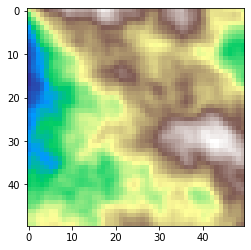

In [ ]:
shape = (50,50)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

world = np.zeros((shape[0], shape[1]))
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=42)
matplotlib.pyplot.imshow(world,cmap='terrain')

### Gradient HeatMap in 3D

In [ ]:
# # Data
# X = np.linspace(-8, 8, 100)
# Y = np.linspace(-4, 4, 100)
# X, Y = np.meshgrid(X, Y)
# Z = X**2 + Y**2
# # z = np.sqrt(xs**2+ys**2) 
# # Plot the 3d surface
# surface = ax.plot_surface(X, Y, Z,
#                           cmap=cm.coolwarm,
#                           rstride = 2,
#                           cstride = 2)

# matplotlib.pyplot.imshow(Z,cmap='terrain')

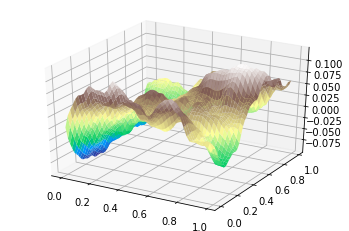

In [ ]:
lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,world,cmap='terrain')

In [ ]:
terrain_cmap = matplotlib.cm.get_cmap('terrain')
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

terrain = matplotlib_to_plotly(terrain_cmap, 255)
import plotly
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)

fig = go.Figure(data=[go.Surface(colorscale=terrain,z=world)])

fig.update_layout(title='Random 3D Terrain')

# Note that include_plotlyjs is used as cdn so that the static site generator can read it and present it on the browser. This is not typically required.
html = plotly.offline.plot(fig, filename='3d-terrain-plotly.html',include_plotlyjs='cdn')
from IPython.core.display import HTML
HTML(html)

### Gradient HeatMap in 2D Converge Aims

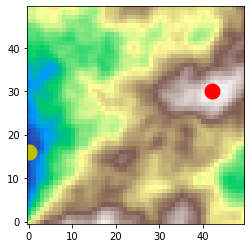

In [ ]:
from IPython.core.display import HTML
import plotly
import plotly.graph_objects as go
import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

z = world
matplotlib.pyplot.imshow(z,origin='lower',cmap='terrain')

# Find maximum value index in numpy array
indices = np.where(z == z.max())
max_z_x_location, max_z_y_location = (indices[1][0],indices[0][0])
matplotlib.pyplot.plot(max_z_x_location,max_z_y_location,'ro',markersize=15)

# Find minimum value index in numpy array
indices = np.where(z == z.min())
min_z_x_location, min_z_y_location = (indices[1][0],indices[0][0])
matplotlib.pyplot.plot(min_z_x_location,min_z_y_location,'yo',markersize=15)

In [ ]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

def sliding_window(arr, window_size):
    """ Construct a sliding window view of the array"""
    arr = np.asarray(arr)
    window_size = int(window_size)
    if arr.ndim != 2:
        raise ValueError("need 2-D input")
    if not (window_size > 0):
        raise ValueError("need a positive window size")
    shape = (arr.shape[0] - window_size + 1,
             arr.shape[1] - window_size + 1,
             window_size, window_size)
    if shape[0] <= 0:
        shape = (1, shape[1], arr.shape[0], shape[3])
    if shape[1] <= 0:
        shape = (shape[0], 1, shape[2], arr.shape[1])
    strides = (arr.shape[1]*arr.itemsize, arr.itemsize,
               arr.shape[1]*arr.itemsize, arr.itemsize)
    return as_strided(arr, shape=shape, strides=strides)

def cell_neighbours(arr, i, j, d):
    """Return d-th neighbors of cell (i, j)"""
    w = sliding_window(arr, 2*d+1)

    ix = np.clip(i - d, 0, w.shape[0]-1)
    jx = np.clip(j - d, 0, w.shape[1]-1)

    i0 = max(0, i - d - ix)
    j0 = max(0, j - d - jx)
    i1 = w.shape[2] - max(0, d - i + ix)
    j1 = w.shape[3] - max(0, d - j + jx)

    return w[ix, jx][i0:i1,j0:j1].ravel()

In [ ]:
from dataclasses import dataclass

@dataclass
class descent_step:
    """Class for storing each step taken in gradient descent"""
    value: float
    x_index: float
    y_index: float

def gradient_descent_3d(array,x_start,y_start,steps=100,step_size=1,plot=False):
    # Initial point to start gradient descent at
    step = descent_step(array[y_start][x_start],x_start,y_start)
    
    # Store each step taken in gradient descent in a list
    step_history = []
    step_history.append(step)
    
    # Plot 2D representation of array with startng point as a red marker
    if plot:
        matplotlib.pyplot.imshow(array,origin='lower',cmap='terrain')
        matplotlib.pyplot.plot(x_start,y_start,'ro')
    current_x = x_start
    current_y = y_start

    # Loop through specified number of steps of gradient descent to take
    for i in range(steps):
        prev_x = current_x
        prev_y = current_y
        
        # Extract array of neighbouring cells around current step location with size nominated
        neighbours=cell_neighbours(array,current_y,current_x,step_size)
        
        # Locate minimum in array (steepest slope from current point)
        next_step = neighbours.min()
        indices = np.where(array == next_step)
        
        # Update current point to now be the next point after stepping
        current_x, current_y = (indices[1][0],indices[0][0])
        step = descent_step(array[current_y][current_x],current_x,current_y)
        
        step_history.append(step)
        
        # Plot each step taken as a black line to the current point nominated by a red marker
        if plot:
            matplotlib.pyplot.plot([prev_x,current_x],[prev_y,current_y],'k-')
            matplotlib.pyplot.plot(current_x,current_y,'ro')
            
        # If step is to the same location as previously, this infers convergence and end loop
        if prev_y == current_y and prev_x == current_x:
            # print(f"Converged in {i} steps")
            break
    return next_step,step_history

### GD in 2D

Target: -0.0994970053434372 @ (array([16]), array([0]))
Optimal step size 10
Steps: [descent_step(value=0.10347005724906921, x_index=38, y_index=28), descent_step(value=0.007558110170066357, x_index=28, y_index=38), descent_step(value=-0.03461135923862457, x_index=18, y_index=39), descent_step(value=-0.03682023286819458, x_index=8, y_index=35), descent_step(value=-0.07587684690952301, x_index=0, y_index=26), descent_step(value=-0.0994970053434372, x_index=0, y_index=16), descent_step(value=-0.0994970053434372, x_index=0, y_index=16)]


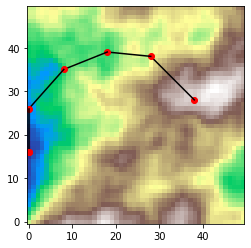

In [ ]:
np.random.seed(42)
global_minimum = z.min()
indices = np.where(z == global_minimum)
print(f"Target: {global_minimum} @ {indices}")

step_size = 0
found_minimum = 99999

# Random starting point
start_x = np.random.randint(0,50)
start_y = np.random.randint(0,50)

# Increase step size until convergence on global minimum
while found_minimum != global_minimum:
    step_size += 1
    found_minimum,steps = gradient_descent_3d(z,start_x,start_y,step_size=step_size,plot=False)

print(f"Optimal step size {step_size}")
found_minimum,steps = gradient_descent_3d(z,start_x,start_y,step_size=step_size,plot=True)
print(f"Steps: {steps}")

In [ ]:
def multiDimenDist(point1,point2):
   #find the difference between the two points, its really the same as below
   deltaVals = [point2[dimension]-point1[dimension] for dimension in range(len(point1))]
   runningSquared = 0
   #because the pythagarom theorm works for any dimension we can just use that
   for coOrd in deltaVals:
       runningSquared += coOrd**2
   return runningSquared**(1/2)
def findVec(point1,point2,unitSphere = False):
  #setting unitSphere to True will make the vector scaled down to a sphere with a radius one, instead of it's orginal length
  finalVector = [0 for coOrd in point1]
  for dimension, coOrd in enumerate(point1):
      #finding total differnce for that co-ordinate(x,y,z...)
      deltaCoOrd = point2[dimension]-coOrd
      #adding total difference
      finalVector[dimension] = deltaCoOrd
  if unitSphere:
      totalDist = multiDimenDist(point1,point2)
      unitVector =[]
      for dimen in finalVector:
          unitVector.append( dimen/totalDist)
      return unitVector
  else:
      return finalVector
    

### GD in 3D

In [ ]:
def generate_3d_plot(step_history):
    # Initialise empty lists for markers
    step_markers_x = []
    step_markers_y = []
    step_markers_z = []
    step_markers_u = []
    step_markers_v = []
    step_markers_w = []
    
    for index, step in enumerate(step_history):
        step_markers_x.append(step.x_index)
        step_markers_y.append(step.y_index)
        step_markers_z.append(step.value)
        
        # If we haven't reached the final step, calculate the vector between the current step and the next step
        if index < len(steps)-1:
            vec1 = [step.x_index,step.y_index,step.value]
            vec2 = [steps[index+1].x_index,steps[index+1].y_index,steps[index+1].value]

            result_vector = findVec(vec1,vec2)
            step_markers_u.append(result_vector[0])
            step_markers_v.append(result_vector[1])
            step_markers_w.append(result_vector[2])
        else:
            step_markers_u.append(0.1)
            step_markers_v.append(0.1)
            step_markers_w.append(0.1)
    
    # Include cones at each marker to show direction of step, scatter3d is to show the red line between points and surface for the terrain
    fig = go.Figure(data=[
        go.Cone(
        x=step_markers_x,
        y=step_markers_y,
        z=step_markers_z,
        u=step_markers_u,
        v=step_markers_v,
        w=step_markers_w,
        sizemode="absolute",
        sizeref=2,
        anchor='tail'),

        go.Scatter3d(
        x=step_markers_x,
        y=step_markers_y,
        z=step_markers_z,
        mode='lines',
        line=dict(
            color='red',
            width=2
        )),

        go.Surface(colorscale=terrain,z=world,opacity=0.5)])


    # Z axis is limited to the extent of the terrain array
    fig.update_layout(
        title='Gradient Descent Steps',
        scene = dict(zaxis = dict(range=[world.min(),world.max()],),),)
    return fig
    
# Generate 3D plot from previous random starting location
fig = generate_3d_plot(steps)
HTML(plotly.offline.plot(fig, filename='random_starting_point_3d_gradient_descent.html',include_plotlyjs='cdn'))

### Converge to local optimal if step size is too large.

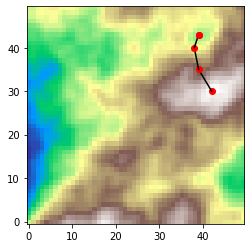

In [ ]:
found_minimum,steps = gradient_descent_3d(z,max_z_x_location,max_z_y_location,step_size=5,plot=True)
fig = generate_3d_plot(steps)
HTML(plotly.offline.plot(fig, filename='maximum_starting_point_step_size_5_3d_gradient_descent.html',include_plotlyjs='cdn'))